# 绘图和可视化

信息可视化是数据分析中最重要的工作之一。它可能是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等。另外，做一个可交互的数据可视化也许是工作的最终目标。Python有许多库进行静态或动态的数据可视化，但这里主要关注于matplotlib和基于它的库。

matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面），其目的是为Python构建一个MATLAB式的绘图接口。matplotlib支持各种操作系统上许多不同的GUI后端，而且还能将图片导出为各种常见的矢量（vector）和光栅（raster）图：PDF、SVG、JPG、PNG、BMP、GIF等。随着时间的发展，matplotlib衍生出了多个数据可视化的工具集，它们使用matplotlib作为底层。其中之一是seaborn，本笔记后面会提到它。

In [95]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

在开头加上如下代码可以在jupyter notebook行内形成交互式的图表，可以进行放大缩小等操作

%matplotlib notebook

## matplotlib API 接口

In [96]:
import matplotlib.pyplot as plt

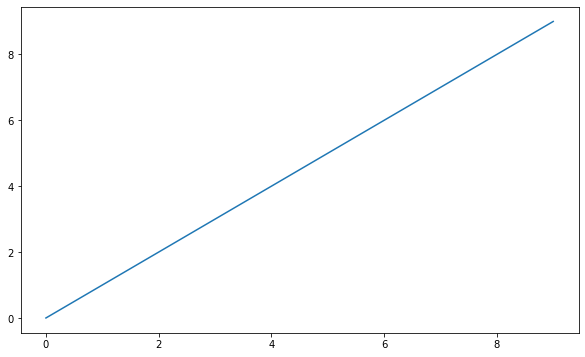

In [115]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### Figures和Subplots

rand返回标准正态分布，cumsum是进行累加

In [117]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

plt.close('all')

提示：使⽤Jupyter notebook有⼀点不同，即每个⼩窗重新执⾏后，图形会被重置。因此，对于复杂的图形，必须将所有的绘图命令存在⼀个⼩窗⾥。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D770BCC08>,
      dtype=object)

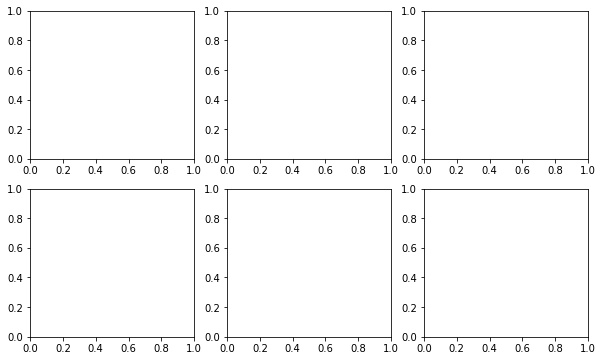

In [118]:
fig, axes = plt.subplots(2, 3)
axes

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。

#### 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，下面是个例子：

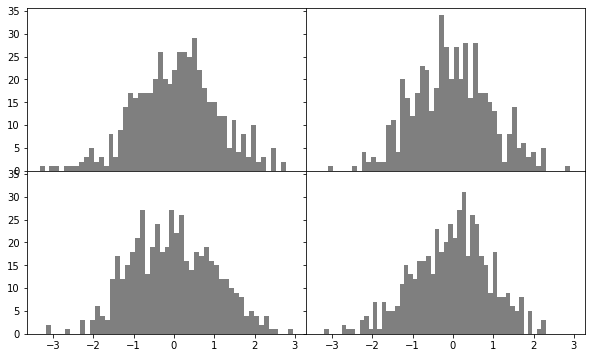

In [126]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

通过wspace=0, hspace=0可以将间距设置为0。
不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，只能自己设定刻度位置和刻度标签。

### 颜色、标记和线型

标记可以放到格式字符串中，但标记类型和线型必须放在颜⾊后⾯：

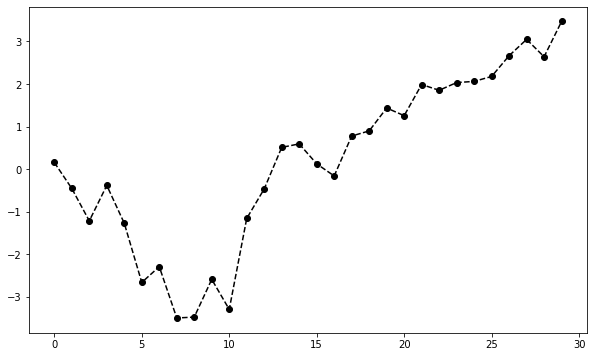

In [128]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [129]:
plt.close('all')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改：

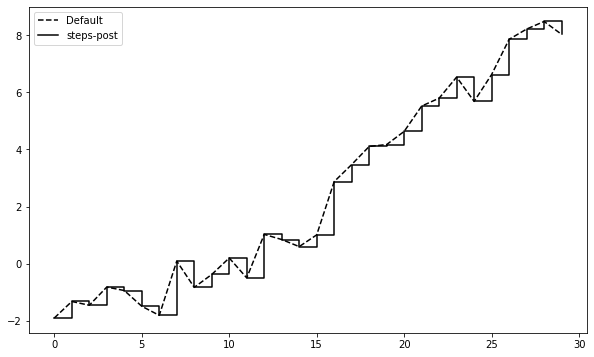

In [132]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

**你必须调用plt.legend（或使用ax.legend，如果引用了轴的话）来创建图例，无论你绘图时是否传递label标签选项。**

### 刻度、标签和图例

对于大多数的图表装饰项，其主要实现方式有二：使用过程型的pyplot接口（例如，matplotlib.pyplot）以及更为面向对象的原生matplotlib API。

pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：

- 调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
- 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

####  设置标题、轴标签、刻度以及刻度标签

为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步。要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签，rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题

Text(0.5, 0, 'Stages')

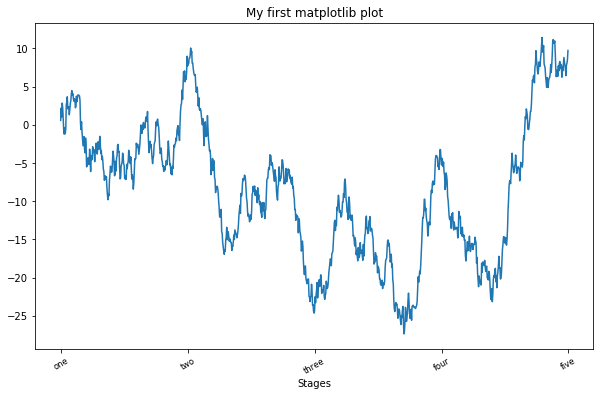

In [139]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

set_xticks是设定标签的实际数字，而set_xticklabels则是设定我们希望他显示的结果